# Mark 11

In [506]:
import skimage.io
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read Images

In [507]:
all_imgs = {
    'hrf': cv2.imread('/Users/teguhsatya/Dev/segeralulus/samples/s_hrf.jpg'),
    'dgs': cv2.imread('/Users/teguhsatya/Dev/segeralulus/samples/s_drishti.png'),
    'rm': cv2.imread('/Users/teguhsatya/Dev/segeralulus/samples/s_rm.png')
}

In [508]:
def all_to_rgb(imgs):
    rgbs = {}
    for img in imgs:
        rgbs[img] = cv2.cvtColor(imgs[img], cv2.COLOR_BGR2RGB)
    return rgbs

In [509]:
def resize_to(imgs, scale):
    resized_imgs = {}
    for img in imgs:
        dim = (int(imgs[img].shape[1]*scale/100), int(imgs[img].shape[0]*scale/100))
        resized_imgs[img] = cv2.resize(imgs[img], dim, interpolation=cv2.INTER_AREA)
    return resized_imgs
        

# Convert to RGB

In [510]:
rgb_imgs = all_to_rgb(all_imgs)

# Resize

In [511]:
rsz = resize_to(rgb_imgs, 30)

In [512]:
def display_all(imgs, use_gray=False):
    fig, axs = plt.subplots(1, len(imgs),figsize=(18, 10))
    for i, img in enumerate(imgs):
        axs[i].imshow(imgs[img])
        axs[i].set_title(img)

In [513]:
def display_all_with(imgs:dict, cc:int=0, use_gray:bool=True)->None:
    '''
    Displaying all images with specific color channel
    
    :params imgs: citra
    :params cc: color channel
    :params use_gray: tampilkan dengan grayscale
    
    :return:
    None
    '''
    fig, axs = plt.subplots(1, len(imgs), figsize=(18,10))
    for i, img in enumerate(imgs):
        if use_gray:
            axs[i].imshow(imgs[img][:,:,cc], cmap='gray')
        else:
            axs[i].imshow(imgs[img])
        axs[i].set_title(img)

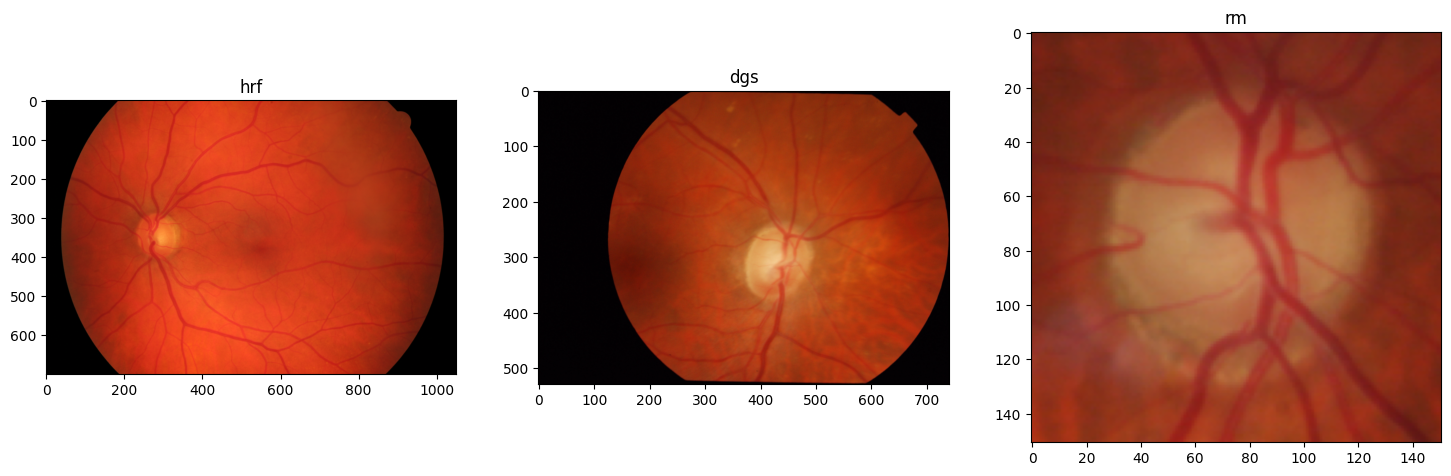

In [514]:
display_all(rsz)

# ROI

In [515]:
def extract_roi(imgs:dict, wlim:int=80) -> dict:
    '''
    Ekstrak ROI
    
    :params imgs: citra
    :params wlim: limit width ROI
    
    :returns:
    ROI dict
    '''
    rois = {}
    for img in imgs:
        if imgs[img].shape[0] < 160:
            rois[img] = imgs[img]
        else:
            gray_c = imgs[img].copy()
            gray_c = cv2.cvtColor(gray_c, cv2.COLOR_RGB2GRAY)
            xmax = cv2.minMaxLoc(gray_c)[3][0]
            ymax = cv2.minMaxLoc(gray_c)[3][1]
            print(xmax, ymax)
            rois[img] = imgs[img][ymax-wlim:ymax+wlim,xmax-wlim:xmax+wlim]
    return rois

In [516]:
roi = extract_roi(rsz)

293 353
428 306


# Preprocess

In [517]:
def preprocess(imgs, medsize=37):
    preprocessed = {}
    for img in imgs:
        imgs[img][:,:,0] = cv2.medianBlur(imgs[img][:,:,0], medsize)
        preprocessed[img] = imgs[img]
    return preprocessed

In [518]:
roic = roi.copy()

In [519]:
prp = preprocess(roic, medsize=37)

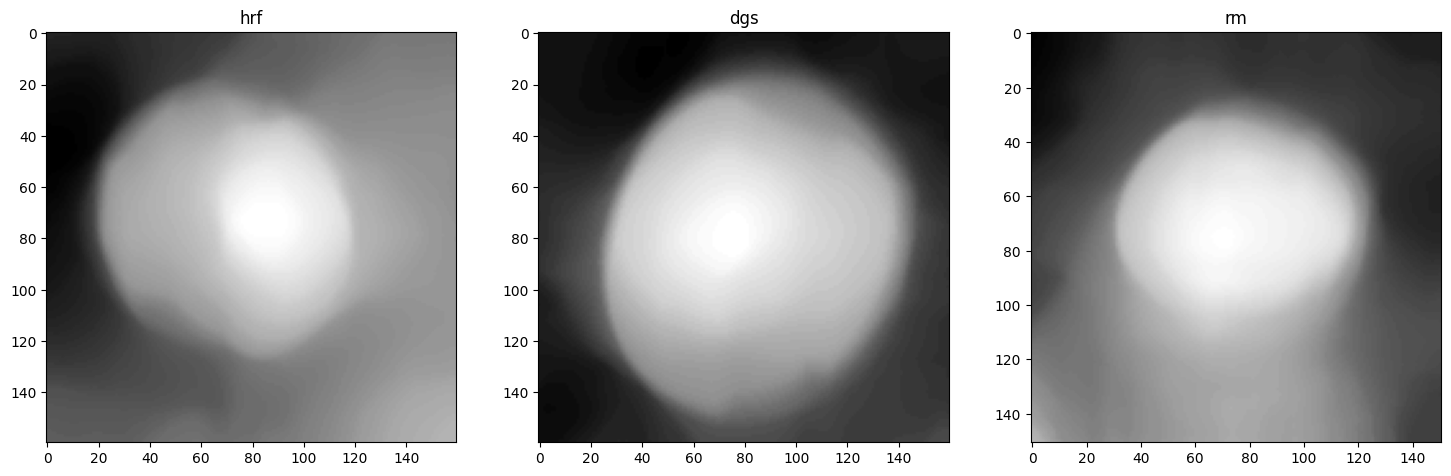

In [520]:
display_all_with(prp, 0)

In [521]:
reds = {}
for img in prp.copy():
    reds[img] = prp.copy()[img][:,:,0]

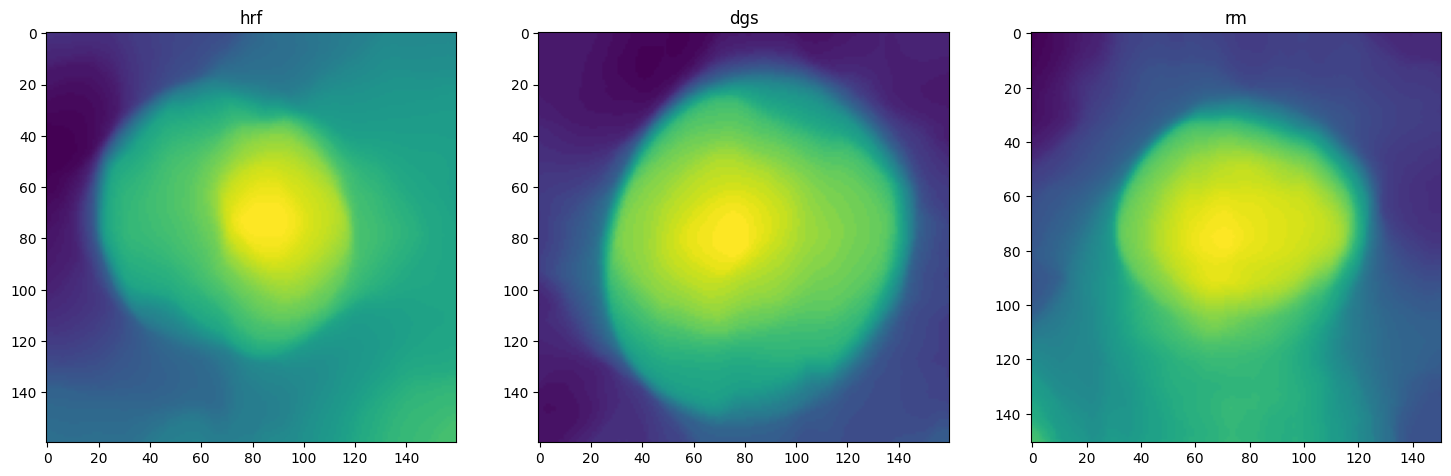

In [522]:
display_all(reds)

In [528]:
Z = reds['hrf'].reshape((-1, 2))
Z = np.float32(Z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 5
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((reds['hrf'].shape))


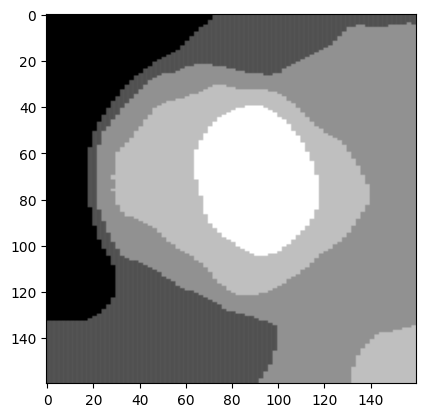

In [529]:
plt.imshow(res2, cmap='gray')